In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data1 = np.genfromtxt('2024_12_22_a/LOGS_1222_a_add/profile10.data', names=True, skip_header=5)

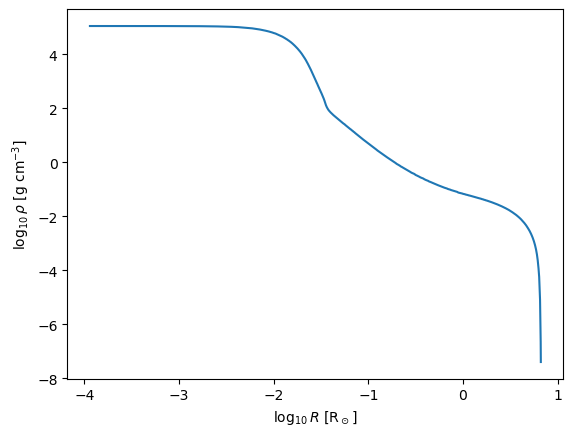

In [6]:
plt.plot(data1['logR'],data1['logRho'])
plt.xlabel(r'$\log_{10} R~{[\rm R_\odot}]$')
plt.ylabel(r'$\log_{10} \rho~{[\rm g\ cm^{-3}]}$')
plt.show()

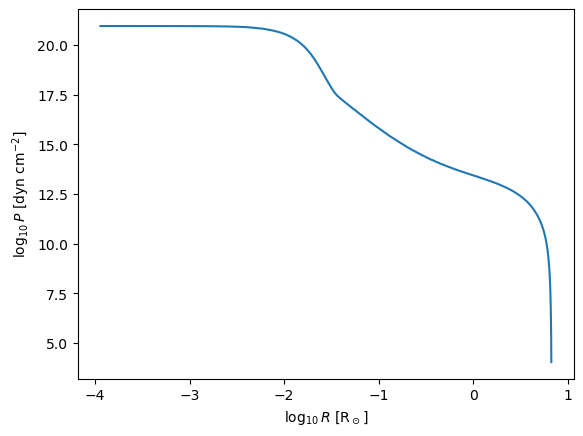

In [7]:
plt.plot(data1['logR'],data1['logP'])
plt.xlabel(r'$\log_{10} R~{[\rm R_\odot}]$')
plt.ylabel(r'$\log_{10} P~{[\rm dyn\ cm^{-2}]}$')
plt.show()

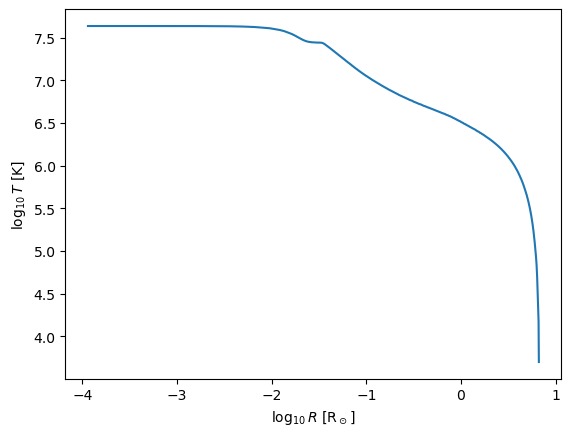

In [8]:
plt.plot(data1['logR'],data1['logT'])
plt.xlabel(r'$\log_{10} R~{[\rm R_\odot}]$')
plt.ylabel(r'$\log_{10} T~{[\rm K]}$')
plt.show()

In [9]:
radius_data = 10**data1['logR']
parameter_data_rho = data1['logRho']-np.max(data1['logRho'])
parameter_data_T = data1['logT']-np.max(data1['logT'])
parameter_data_P = data1['logP']-np.max(data1['logP'])
print(10**np.max(data1['logRho']))
print(10**np.max(data1['logT']))
print(10**np.max(data1['logP']))

110793.48900496274
43355331.78709003
8.812084002968586e+20


In [10]:
R_star = max(radius_data)

x_map = np.linspace(-R_star, R_star, 1000)
y_map = np.linspace(-R_star, R_star, 1000)
X, Y = np.meshgrid(x_map, y_map)
Parameter_map_rho = [[] for i in range(np.size(X, 0))]
Parameter_map_T = [[] for i in range(np.size(X, 0))]
Parameter_map_P = [[] for i in range(np.size(X, 0))]
print(R_star)
for i in range(np.size(X, 0)):
    for j in range(np.size(X, 1)):
        Parameter_map_rho[i].append(parameter_data_rho[np.argmin(abs(np.sqrt(X[i][j]**2+Y[i][j]**2)-radius_data))])
        Parameter_map_T[i].append(parameter_data_T[np.argmin(abs(np.sqrt(X[i][j]**2+Y[i][j]**2)-radius_data))])
        Parameter_map_P[i].append(parameter_data_P[np.argmin(abs(np.sqrt(X[i][j]**2+Y[i][j]**2)-radius_data))])
Parameter_map_rho = np.array(Parameter_map_rho)
Parameter_map_T = np.array(Parameter_map_T)
Parameter_map_P = np.array(Parameter_map_P)

mask = np.sqrt(X**2+Y**2)<=R_star

Parameter_map_rho[~mask] = np.nan
Parameter_map_T[~mask] = np.nan
Parameter_map_P[~mask] = np.nan

6.646493609226397


110793.48900496274


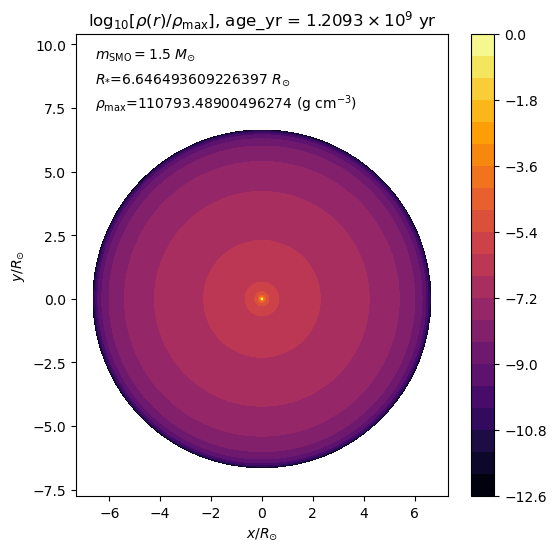

In [11]:
plt.figure(figsize=(6, 6))
parameter_distribution = plt.contourf(X, Y, Parameter_map_rho, 20, cmap='inferno')
plt.colorbar(parameter_distribution)
plt.axis('equal')
x_min, x_max = -1.1*R_star, 1.1*R_star
y_min, y_max = -1.1*R_star, 1.5*R_star
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(r'$x/R_{\odot}$')
plt.ylabel(r'$y/R_{\odot}$')
plt.title(r'$\mathrm{log_{10}}[\rho(r)/\rho_{\rm max}]$, age_yr = $1.2093\times 10^{9}$ yr')
plt.text(0.9*x_min, 0.95*y_max, r'$m_{\rm SMO}=1.5\ M_{\odot}$')
plt.text(0.9*x_min, 0.85*y_max, r'$R_{{*}}$={} $R_{{\odot}}$'.format(R_star))
plt.text(0.9*x_min, 0.75*y_max, r'$\rho_{{\rm max}}$={} $(\mathrm{{g\ cm^{{-3}}}})$'.format(10**np.max(data1['logRho'])))
print(10**np.max(data1['logRho']))
#plt.savefig('d:/documents/Classes/Stellar/mesa_figure/1_5_Stellar/Rho_Evolution_1_5/rho_structure_1_5_profile48.pdf')
plt.show()

43355331.78709003


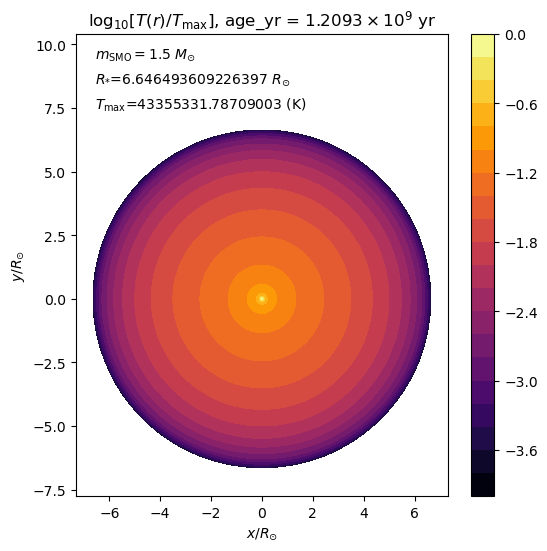

In [12]:
plt.figure(figsize=(6, 6))
parameter_distribution = plt.contourf(X, Y, Parameter_map_T, 20, cmap='inferno')
plt.colorbar(parameter_distribution)
plt.axis('equal')
x_min, x_max = -1.1*R_star, 1.1*R_star
y_min, y_max = -1.1*R_star, 1.5*R_star
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(r'$x/R_{\odot}$')
plt.ylabel(r'$y/R_{\odot}$')
plt.title(r'$\mathrm{log_{10}}[T(r)/T_{\rm max}]$, age_yr = $1.2093\times 10^{9}$ yr')
plt.text(0.9*x_min, 0.95*y_max, r'$m_{\rm SMO}=1.5\ M_{\odot}$')
plt.text(0.9*x_min, 0.85*y_max, r'$R_{{*}}$={} $R_{{\odot}}$'.format(R_star))
plt.text(0.9*x_min, 0.75*y_max, r'$T_{{\rm max}}$={} $(\mathrm{{K}})$'.format(10**np.max(data1['logT'])))
print(10**np.max(data1['logT']))
#plt.savefig('d:/documents/Classes/Stellar/mesa_figure/1_5_Stellar/T_Evolution_1_5/T_structure_1_5_profile48.pdf')
plt.show()

8.812084002968586e+20


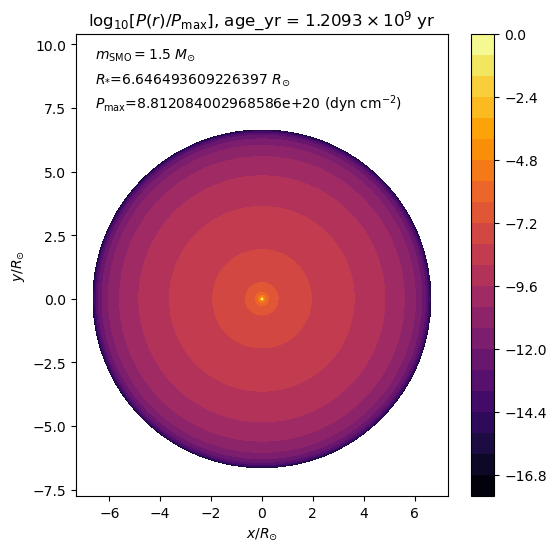

In [13]:
plt.figure(figsize=(6, 6))
parameter_distribution = plt.contourf(X, Y, Parameter_map_P, 20, cmap='inferno')
plt.colorbar(parameter_distribution)
plt.axis('equal')
x_min, x_max = -1.1*R_star, 1.1*R_star
y_min, y_max = -1.1*R_star, 1.5*R_star
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(r'$x/R_{\odot}$')
plt.ylabel(r'$y/R_{\odot}$')
plt.title(r'$\mathrm{log_{10}}[P(r)/P_{\rm max}]$, age_yr = $1.2093\times 10^{9}$ yr')
plt.text(0.9*x_min, 0.95*y_max, r'$m_{\rm SMO}=1.5\ M_{\odot}$')
plt.text(0.9*x_min, 0.85*y_max, r'$R_{{*}}$={} $R_{{\odot}}$'.format(R_star))
plt.text(0.9*x_min, 0.75*y_max, r'$P_{{\rm max}}$={} $(\mathrm{{dyn\ cm^{{-2}}}})$'.format(10**np.max(data1['logP'])))
print(10**np.max(data1['logP']))
#plt.savefig('d:/documents/Classes/Stellar/mesa_figure/1_5_Stellar/P_Evolution_1_5/P_structure_1_5_profile48.pdf')
plt.show()